Skeleton notebook by Federica Bianco

Modified by Julián Ferreiro. 

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#importing datasets
df_mur=pd.read_csv("World firearms murders and ownership - Sheet 1.csv") #World Firearms murders 
df_ms=pd.read_csv("data-pvLFI.csv")  #Mass Shootings
df_pop=pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2.csv", skiprows=(0,2)) #Population, we are skipping rows because the first two 
                                                                        #don't have relevant information
df_gdp=pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows=(0,2))  #GDP

In [3]:
#we are reducing the data frames to the columns we want.
df_mur=df_mur[["Country/Territory","Number of homicides by firearm","Average total all civilian firearms"]]
df_ms
df_pop=df_pop[["Country Name","2012"]]
df_gdp=df_gdp[["Country Name","2012"]]


In [4]:
#renaming columns for consistency
df_pop.columns=["Country Name","Population"]
df_gdp.columns=["Country Name","GDP"]


In [5]:
#merging columns
df = df_pop.merge(df_gdp, right_on="Country Name", left_on="Country Name")
df = df.merge(df_ms,  right_on="Country", left_on="Country Name")
df = df.merge(df_mur,  right_on="Country/Territory", left_on="Country Name")
df = df.drop('Country', 1)
df.head()

,Country Name,Population,GDP,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Australia,22728254.0,1.538194e+12,15.0,4,Australia,30.0,3050000.0
1,Austria,8429991.0,4.074516e+11,30.4,1,Austria,18.0,2500000.0
2,Canada,34750545.0,1.824289e+12,30.8,4,Canada,173.0,9950000.0
3,Switzerland,7996861.0,6.650541e+11,45.7,2,Switzerland,57.0,3400000.0
4,Germany,80425823.0,3.543984e+12,30.3,7,Germany,158.0,25000000.0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


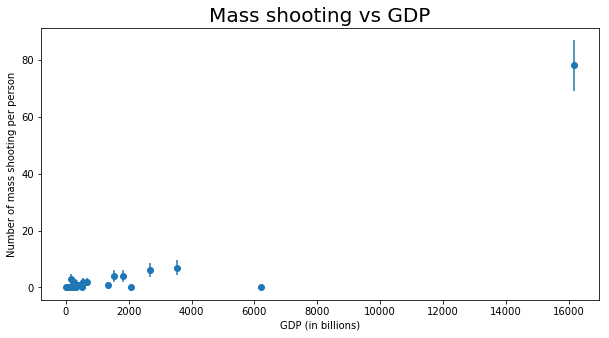

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [6]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.GDP / 1e9, df['Number of mass shootings'])
ax.errorbar(df.GDP / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title("Mass shooting vs GDP",fontsize=20)
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


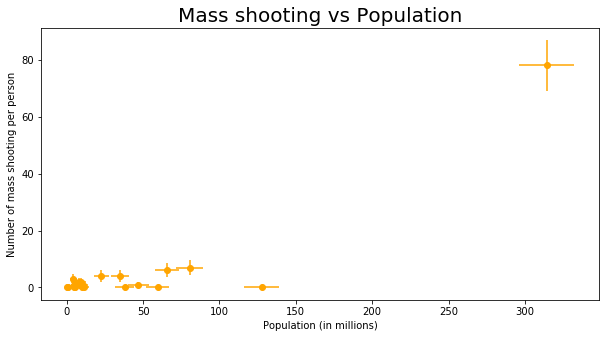

Number of mass shooting vs Population, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, 


In [7]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.Population / 1e6, df['Number of mass shootings'],color="orange")
ax.errorbar(df.Population / 1e6, df['Number of mass shootings'], xerr= np.sqrt(df.Population/ 1e6) ,
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.',color="orange")
ax.set_xlabel("Population (in millions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title("Mass shooting vs Population",fontsize=20)
pl.show()
print ("Number of mass shooting vs Population, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, ")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

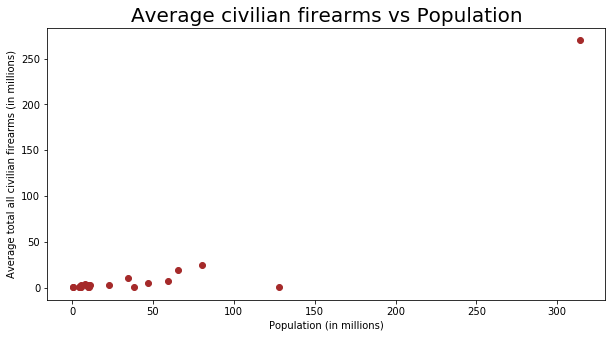

Average total all civilian firearms (in millions) vs Population (in millions), errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, 


In [8]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.Population / 1e6, df['Average total all civilian firearms']/1e6,color="brown")

ax.set_xlabel("Population (in millions)")
ax.set_ylabel("Average total all civilian firearms (in millions)")
ax.set_ylim()
ax.set_title("Average civilian firearms vs Population",fontsize=20)
pl.show()
print ("Average total all civilian firearms (in millions) vs Population (in millions), " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, ")

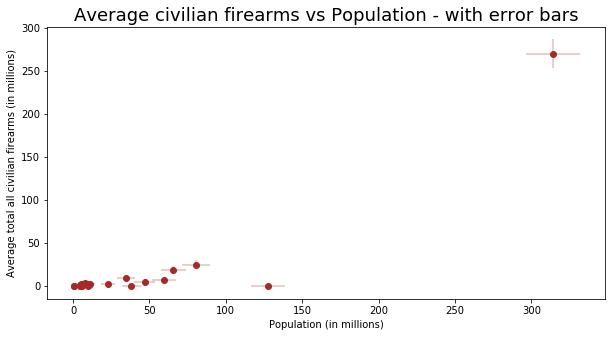

Average total all civilian firearms (in millions) vs Population (in millions), errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, 


In [9]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.Population / 1e6, df['Average total all civilian firearms']/1e6,color="brown")
ax.errorbar(df.Population / 1e6,  df['Average total all civilian firearms']/1e6, xerr= np.sqrt(df.Population/ 1e6) ,
            yerr = np.sqrt( df['Average total all civilian firearms']/1e6 * 1.0), fmt = '.',color="brown", alpha=0.3)
ax.set_xlabel("Population (in millions)")
ax.set_ylabel("Average total all civilian firearms (in millions)")
ax.set_ylim()
ax.set_title("Average civilian firearms vs Population - with error bars",fontsize=18)
pl.show()
print ("Average total all civilian firearms (in millions) vs Population (in millions), " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, ")


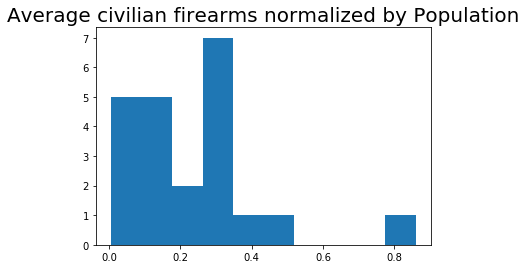

In [10]:
fig, ax = plt.subplots()
ax.set_title("Average civilian firearms normalized by Population",fontsize=20)
ax.hist(df["Average total all civilian firearms"] / df['Population']);

In [11]:
## homicides by firearm per 1000 people

In [12]:
df['shootingspp'] = df["Number of mass shootings"] / df['Population'] * 1e3

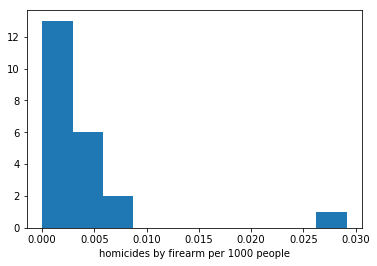

In [13]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['Population'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

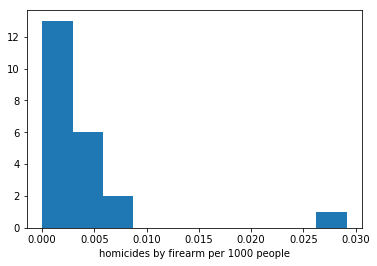

In [14]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['Population'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


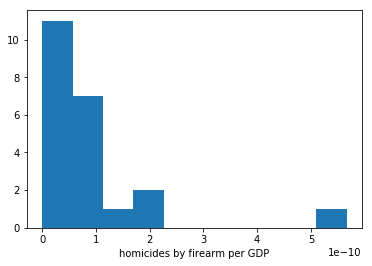

In [15]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['GDP'] )
ax.set_xlabel('homicides by firearm per GDP');

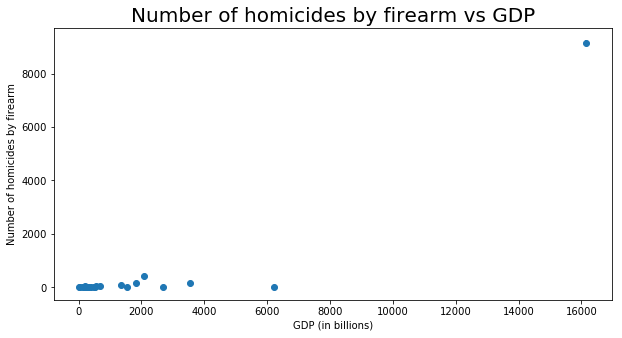

In [16]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)


scatter = ax.scatter(df.GDP / 1e9, df['Number of homicides by firearm'])
ax.errorbar(df.GDP / 1e9, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel('Number of homicides by firearm')
ax.set_ylim()
ax.set_title("Number of homicides by firearm vs GDP",fontsize=20)
pl.show()


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


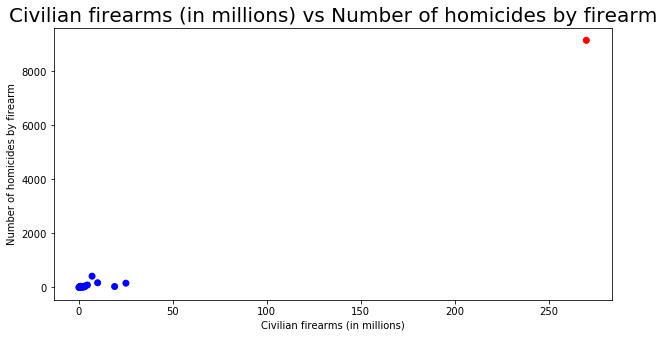

Note: Red dot is the US


In [17]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]

for i in range (0,len(df)):
    if df["Country Name"][i] == "United States":
        col.append("r")
    else:
        col.append("b")


scatter = ax.scatter (df["Average total all civilian firearms"]/1e6,df['Number of homicides by firearm'],color=col)

ax.set_ylabel('Number of homicides by firearm')
ax.set_xlabel("Civilian firearms (in millions)")
ax.set_title("Civilian firearms (in millions) vs Number of homicides by firearm",fontsize=20)
ax.set_ylim()
pl.show()
print "Note: Red dot is the US"

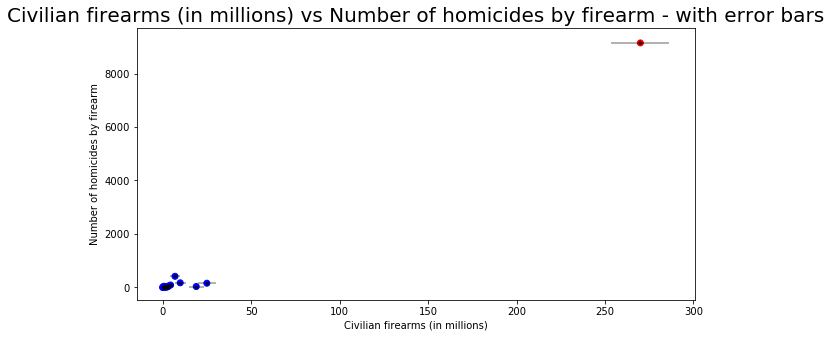

Note: Red dot is the US


In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]

for i in range (0,len(df)):
    if df["Country Name"][i] == "United States":
        col.append("r")
    else:
        col.append("b")

scatter = ax.scatter (df["Average total all civilian firearms"]/1e6,df['Number of homicides by firearm'],color=col)


ax.errorbar(df["Average total all civilian firearms"]/1e6,df['Number of homicides by firearm'], xerr= np.sqrt(df["Average total all civilian firearms"]/1e6) ,
           yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.',color="black", alpha=0.4)

ax.set_title("Civilian firearms (in millions) vs Number of homicides by firearm - with error bars",fontsize=20)
ax.set_ylabel('Number of homicides by firearm')
ax.set_xlabel("Civilian firearms (in millions)")
ax.set_ylim()
pl.show()
print "Note: Red dot is the US"

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


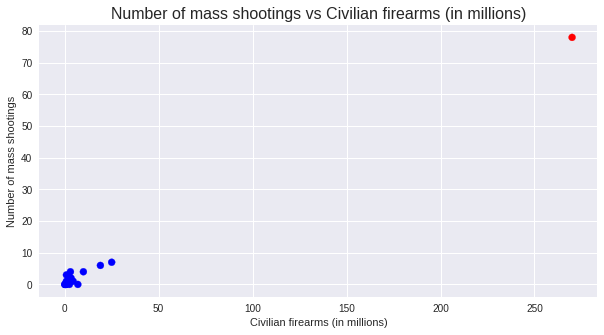

Note: Red dot is the US


In [31]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]

for i in range (0,len(df)):
    if df["Country Name"][i] == "United States":
        col.append("r")
    else:
        col.append("b")


scatter = ax.scatter (df["Average total all civilian firearms"]/1e6,df["Number of mass shootings"],color=col)

ax.set_title("Number of mass shootings vs Civilian firearms (in millions)",fontsize=16)
ax.set_ylabel('Number of mass shootings')
ax.set_xlabel("Civilian firearms (in millions)")
ax.set_ylim()
pl.show()
print "Note: Red dot is the US"

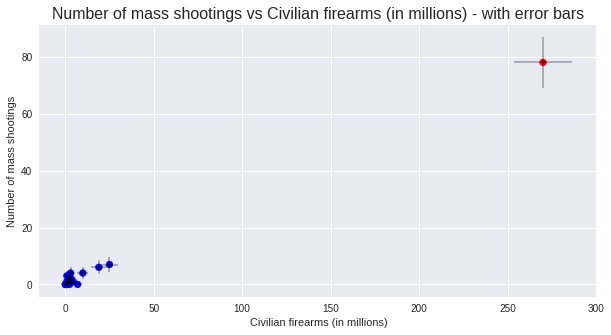

Note: Red dot is the US


In [32]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]

for i in range (0,len(df)):
    if df["Country Name"][i] == "United States":
        col.append("r")
    else:
        col.append("b")


scatter = ax.scatter (df["Average total all civilian firearms"]/1e6,df["Number of mass shootings"],color=col)


ax.errorbar(df["Average total all civilian firearms"]/1e6,df["Number of mass shootings"], xerr= np.sqrt(df["Average total all civilian firearms"]/1e6) ,
           yerr = np.sqrt(df["Number of mass shootings"] * 1.0), fmt = '.',color="black", alpha=0.3)
ax.set_title("Number of mass shootings vs Civilian firearms (in millions) - with error bars",fontsize=16)
ax.set_ylabel('Number of mass shootings')
ax.set_xlabel("Civilian firearms (in millions)")
ax.set_ylim()
pl.show()
print "Note: Red dot is the US"

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [21]:
import statsmodels.formula.api as st
import statsmodels as sm
import seaborn as sns
import statsmodels.graphics.regressionplots

In [22]:
df["Average total all civilian firearms"].mean()

16285227.272727273

In [23]:
df["masshootingpp"]=df["Number of mass shootings"]*1e6/ (df["Population"])
df["firearmspp"]=df["Average total all civilian firearms"]/ ((df["Population"]))

In [24]:
model=st.ols(formula =" masshootingpp~firearmspp", data=df).fit()


In [25]:
model2=sm.regression.linear_model.WLS(df.masshootingpp,df.firearmspp,weights=1/abs(model.resid)).fit()


** Using the abs() function, all error values are transformed to positive, so there're not infinite values**

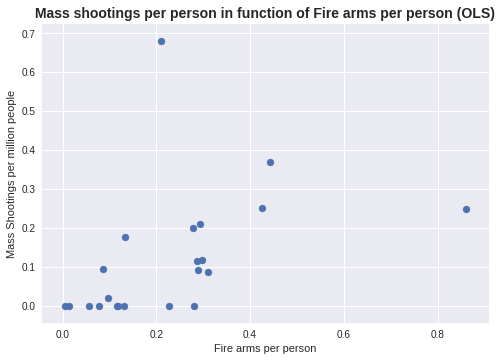

In [26]:
plt.scatter("firearmspp", "masshootingpp", data = df)

plt.xlabel("Fire arms per person")
plt.ylabel("Mass Shootings per million people")
plt.title("Mass shootings per person in function of Fire arms per person (OLS)", weight='bold', fontsize=14);

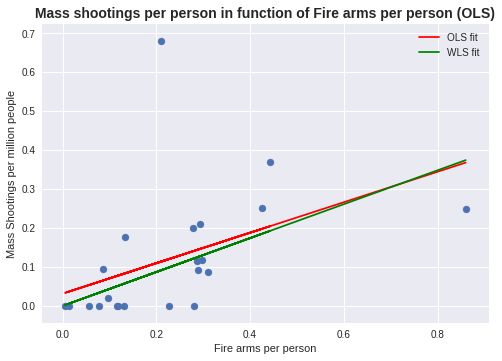

In [42]:
W1 = model.params[1]
W2 = model.params[0] 

wmodel2 = model2.params[0]

plt.scatter("firearmspp", "masshootingpp", data = df,label="")
plt.plot(df["firearmspp"], W1*df["firearmspp"] + W2, c="r",label="OLS fit")
plt.plot(df["firearmspp"], wmodel2*df["firearmspp"], c="g",label="WLS fit")

plt.xlabel("Fire arms per person")
plt.ylabel("Mass Shootings per million people")
plt.legend()
plt.title("Mass shootings per person in function of Fire arms per person (OLS)", weight='bold', fontsize=14);

Figure. Scatter Plot and two different fitting models

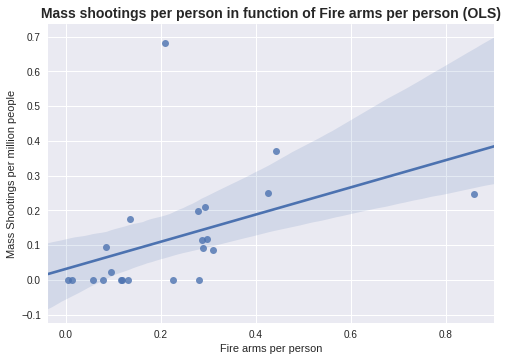

In [43]:
#using regplot to graph confidence intervals

sns.regplot(x=df.firearmspp, y=df.masshootingpp, data=df)
plt.xlabel("Fire arms per person")
plt.ylabel("Mass Shootings per million people")
plt.title("Mass shootings per person in function of Fire arms per person (OLS)", weight='bold', fontsize=14);

**Figure.** Scatter Plot with confidence intervals

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

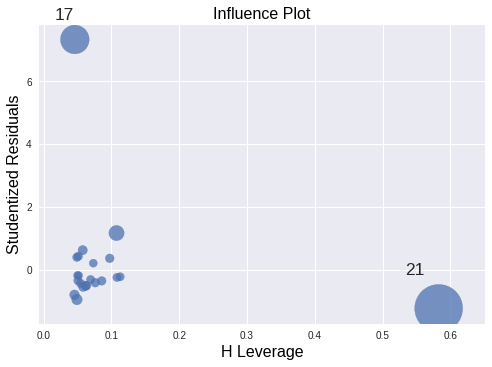

In [29]:
statsmodels.graphics.regressionplots.influence_plot(model, alpha  = 0.05, criterion="cooks");

Figure. Influence plot

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

In all the graphs, US is an outlier with both amount of guns per person, and deaths by firearms.

The linear regression also shows that the amount of firearms per person is a non-trivial predictor of the deaths by firearm. 